In [0]:
from pyspark.sql.functions import *
import pyspark.sql.functions as fn
from pyspark.sql.types import StructType, StructField, StringType,DateType,DecimalType,IntegerType,ArrayType,LongType,BooleanType,DoubleType,FloatType
from pyspark.sql import *
import sys
from pyspark import SparkContext, SparkConf
sc=SparkContext.getOrCreate()
import pyspark.sql.types as typ
import pyspark.ml.feature as ft
import pyspark.ml.evaluation as ev
import pyspark.ml.classification as cl
from pyspark.ml import Pipeline
import pyspark.mllib.linalg as ln
import pyspark.mllib.stat as st
from decimal import Decimal
import pandas as pd
import glob
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.regression import FMRegressor
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
dataset_schema = StructType([
  StructField("id",IntegerType(),True),
  StructField("last_scraped",StringType(),True),
  StructField("name",StringType(),True),
  StructField("host_id",IntegerType(),True),
  StructField("host_name",StringType(),True),
  StructField("host_since",StringType(),True),
  StructField("host_location",StringType(),True),
  StructField("host_response_time",StringType(),True),
  StructField("host_response_rate",StringType(),True),
  StructField("host_acceptance_rate",StringType(),True),
  StructField("host_is_superhost",StringType(),True),
  StructField("host_neighbourhood",StringType(),True),
  StructField("host_listings_count",FloatType(),True),
  StructField("host_total_listings_count",FloatType(),True),
  StructField("host_verifications",StringType(),True),
  StructField("host_has_profile_pic",StringType(),True),
  StructField("host_identity_verified",StringType(),True),
  StructField("neighbourhood_cleansed",StringType(),True),
  StructField("neighbourhood_group_cleansed",StringType(),True),
  StructField("latitude",FloatType(),True),
  StructField("longitude",FloatType(),True),
  StructField("property_type",StringType(),True),
  StructField("room_type",StringType(),True),
  StructField("accommodates",IntegerType(),True),
  StructField("bathrooms",FloatType(),True),
  StructField("bathrooms_text",StringType(),True),
  StructField("bedrooms",FloatType(),True),
  StructField("beds",FloatType(),True),
  StructField("amenities",StringType(),True),
  StructField("price",StringType(),True),
  StructField("price_old",StringType(),True),
  StructField("minimum_nights",IntegerType(),True),
  StructField("maximum_nights",IntegerType(),True),
  StructField("minimum_minimum_nights",FloatType(),True),
  StructField("maximum_minimum_nights",FloatType(),True),
  StructField("minimum_maximum_nights",FloatType(),True),
  StructField("maximum_maximum_nights",FloatType(),True),
  StructField("minimum_nights_avg_ntm",FloatType(),True),
  StructField("maximum_nights_avg_ntm",FloatType(),True),
  StructField("calendar_updated",StringType(),True),
  StructField("has_availability",BooleanType(),True),
  StructField("availability_30",IntegerType(),True),
  StructField("availability_60",IntegerType(),True),
  StructField("availability_90",IntegerType(),True),
  StructField("availability_365",IntegerType(),True),
  StructField("calendar_last_scraped",StringType(),True),
  StructField("number_of_reviews",IntegerType(),True),
  StructField("number_of_reviews_ltm",IntegerType(),True),
  StructField("number_of_reviews_l30d",IntegerType(),True),
  StructField("first_review",StringType(),True),
  StructField("last_review",StringType(),True),
  StructField("review_scores_rating",FloatType(),True),
  StructField("review_scores_accuracy",FloatType(),True),
  StructField("review_scores_cleanliness",FloatType(),True),
  StructField("review_scores_checkin",FloatType(),True),
  StructField("review_scores_communication",FloatType(),True),
  StructField("review_scores_location",FloatType(),True),
  StructField("review_scores_value",FloatType(),True),
  StructField("license",StringType(),True),
  StructField("instant_bookable",StringType(),True),
  StructField("calculated_host_listings_count",IntegerType(),True),
  StructField("calculated_host_listings_count_entire_homes",IntegerType(),True),
  StructField("calculated_host_listings_count_private_rooms",IntegerType(),True),
  StructField("calculated_host_listings_count_shared_rooms",IntegerType(),True),
  StructField("reviews_per_month",FloatType(),True)
])

In [0]:
Airbnb_Listings_df = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/akshaya.srinivasan@sjsu.edu/Airbnb_Merged_Data-1.csv")
Airbnb_Listings_df.head()

Out[3]: Row(id='2595', last_scraped='7/4/21', name='Skylit Midtown Castle', host_id='2845', host_name='Jennifer', host_since='9/9/08', host_location='New York, New York, United States', host_response_time=None, host_response_rate=None, host_acceptance_rate=None, host_is_superhost='FALSE', host_neighbourhood='Midtown', host_listings_count='6', host_total_listings_count='6', host_has_profile_pic='TRUE', host_identity_verified='TRUE', neighbourhood_cleansed='Midtown', neighbourhood_group_cleansed='Manhattan', latitude='40.75356', longitude='-73.98559', property_type='Entire apartment', room_type='Entire home/apt', accommodates='1', bathrooms=None, bathrooms_text='1 bath', bedrooms=None, beds='1', amenities='"[""Free street parking""; ""Hot water""; ""Wifi""; ""Essentials""; ""Dishes and silverware""; ""Coffee maker""; ""Baking sheet""; ""Hair dryer""; ""Cooking basics""; ""Bathtub""; ""Oven""; ""Heating""; ""Paid parking off premises""; ""Smoke alarm""; ""Ethernet connection""; ""TV""; ""

In [0]:
print("Schema for Airbnb Listings:")
Airbnb_Listings_df.printSchema()

print("Imported Dataset for Airbnb Listings:")
display(Airbnb_Listings_df)

In [0]:
# Removing duplicate values
Airbnb_Listings_df = Airbnb_Listings_df.drop_duplicates()
display(Airbnb_Listings_df)

In [0]:
# Identifying the missing value % in each column
Airbnb_Listings_df.agg(*[round(((1 - (fn.count(cnt) / fn.count('*')))*100),3).alias(cnt + 'NULL %') for cnt in Airbnb_Listings_df.columns]).display()

# Dropping columns where majority of the data is missing
Airbnb_Listings_df = Airbnb_Listings_df.drop(Airbnb_Listings_df.license) 
Airbnb_Listings_df = Airbnb_Listings_df.drop(Airbnb_Listings_df.bathrooms) 
Airbnb_Listings_df = Airbnb_Listings_df.drop(Airbnb_Listings_df.name) 
Airbnb_Listings_df = Airbnb_Listings_df.drop(Airbnb_Listings_df.host_name) 

# Creating a temporary view of the dataframe
Airbnb_Listings_df.createOrReplaceTempView("Airbnb_Data")

idNULL %,last_scrapedNULL %,nameNULL %,host_idNULL %,host_nameNULL %,host_sinceNULL %,host_locationNULL %,host_response_timeNULL %,host_response_rateNULL %,host_acceptance_rateNULL %,host_is_superhostNULL %,host_neighbourhoodNULL %,host_listings_countNULL %,host_total_listings_countNULL %,host_has_profile_picNULL %,host_identity_verifiedNULL %,neighbourhood_cleansedNULL %,neighbourhood_group_cleansedNULL %,latitudeNULL %,longitudeNULL %,property_typeNULL %,room_typeNULL %,accommodatesNULL %,bathroomsNULL %,bathrooms_textNULL %,bedroomsNULL %,bedsNULL %,amenitiesNULL %,priceNULL %,price_oldNULL %,minimum_nightsNULL %,maximum_nightsNULL %,minimum_minimum_nightsNULL %,maximum_minimum_nightsNULL %,minimum_maximum_nightsNULL %,maximum_maximum_nightsNULL %,minimum_nights_avg_ntmNULL %,maximum_nights_avg_ntmNULL %,calendar_updatedNULL %,has_availabilityNULL %,availability_30NULL %,availability_60NULL %,availability_90NULL %,availability_365NULL %,calendar_last_scrapedNULL %,number_of_reviewsNULL %,number_of_reviews_ltmNULL %,number_of_reviews_l30dNULL %,first_reviewNULL %,last_reviewNULL %,review_scores_ratingNULL %,review_scores_accuracyNULL %,review_scores_cleanlinessNULL %,review_scores_checkinNULL %,review_scores_communicationNULL %,review_scores_locationNULL %,review_scores_valueNULL %,licenseNULL %,instant_bookableNULL %,calculated_host_listings_countNULL %,calculated_host_listings_count_entire_homesNULL %,calculated_host_listings_count_private_roomsNULL %,calculated_host_listings_count_shared_roomsNULL %,reviews_per_monthNULL %
0.0,0.0,0.036,0.0,0.733,0.733,0.995,46.517,46.526,41.78,0.744,18.998,0.735,0.735,0.733,0.733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.973,0.311,10.185,1.899,0.004,0.0,0.0,0.0,0.0,0.061,0.061,0.061,0.061,0.061,0.061,99.973,0.019,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.605,25.607,26.56,27.461,27.431,27.487,27.453,27.494,27.494,99.975,0.019,0.008,0.0,0.0,0.0,25.605


In [0]:
%sql

CREATE OR REPLACE TEMPORARY VIEW AIRBNB_FORMATTED_DATA AS
(
  SELECT 
     id,                                           -- 3831
     INT(SUBSTRING(last_scraped,0,CHARINDEX('/',last_scraped)-1)) AS MONTH,                                 -- 2021-07-04 
     host_id,                                      -- 4869
     CASE WHEN RIGHT(HOST_SINCE,2)>21 THEN 2021-1900-RIGHT(HOST_SINCE,2) WHEN RIGHT(HOST_SINCE,2)<=21 THEN 2021-2000-RIGHT(HOST_SINCE,2) END AS HOST_YRS,-- 2008-12-07
     COALESCE(SUBSTRING(host_location,0,CHARINDEX(',',host_location)-1),NULL) AS host_city,                                -- New York, New York, United States
     COALESCE(RIGHT(host_location,CHARINDEX(',',REVERSE(host_location))-1),NULL) AS host_country,    
     CASE host_response_time 
          WHEN 'a few days or more' THEN 0
          WHEN 'within a day' THEN 1
          WHEN 'within a few hours' THEN 2
          WHEN 'within an hour' THEN 3
          ELSE 0 
     END AS host_response_time,                    -- within an hour
     COALESCE(INT(TRIM('%' FROM host_response_rate)), (SELECT AVG(INT(TRIM('%' FROM host_response_rate))) FROM AIRBNB_DATA)) AS host_response_rate,    -- 83% 
     COALESCE(INT(TRIM('%' FROM host_acceptance_rate)), (SELECT AVG(INT(TRIM('%' FROM host_acceptance_rate))) FROM AIRBNB_DATA)) AS host_acceptance_rate,   -- 92% 
     CASE host_is_superhost WHEN 'FALSE' THEN 0 ELSE 1 END AS host_is_superhost,                            -- false 
     coalesce(INT(host_listings_count) ,(select avg(INT(host_listings_count)) from  Airbnb_Data)) as host_listings_count,                          -- 1.0 
     CASE host_has_profile_pic WHEN 'FALSE' THEN 0 ELSE 1 END AS host_has_profile_pic,                         -- true 
     CASE host_identity_verified WHEN 'FALSE' THEN 0 ELSE 1 END AS host_identity_verified,                       -- true 
     coalesce(FLOAT(latitude) ,(select avg(FLOAT(latitude)) from  Airbnb_Data)) as latitude,                                     -- 40.68494 
     coalesce(FLOAT(longitude) ,(select avg(FLOAT(longitude)) from  Airbnb_Data)) as longitude,                                    -- -73.95765 
     CASE room_type
        WHEN 'Entire rental unit' THEN 0
        WHEN 'Shared room' THEN 1
        WHEN 'Entire apartment' THEN 0
        WHEN 'Hotel room' THEN 2
        WHEN 'Entire home/apt' THEN 0
        WHEN 'Private room'THEN 3
        WHEN 'Private room in rental unit' THEN 3
        WHEN 'Private room in apartment' THEN 3
        WHEN 'Private room in house' THEN 3
        WHEN 'Private room in residential home' THEN 3
        WHEN 'Entire condominium' THEN 0
        WHEN 'Entire condominium (condo)' THEN 0
        WHEN 'Entire loft' THEN 0
        ELSE 0
     END AS room_type,                                    -- Entire home/apt 
     coalesce(INT(accommodates),(select INT(avg(accommodates)) from  Airbnb_Data))  AS accommodates,                                 -- 3 
     coalesce(INT(bedrooms),(select INT(avg(bedrooms)) from  Airbnb_Data)) AS bedrooms,                                     -- 1.0 
     coalesce(INT(beds),(select INT(avg(beds)) from  Airbnb_Data)) AS beds,                                         -- 3.0 
     COALESCE((length(`amenities`) - length(replace(`amenities`, ';', '')) + 1),0) AS amenities_count,  
     coalesce(INT(TRIM('$' FROM price)),(select avg(INT(TRIM('$' FROM price))) from  Airbnb_Data)) AS price,                                        -- $77.00  
     coalesce(INT(minimum_nights) ,(select INT(avg(INT(minimum_nights))) from  Airbnb_Data)) AS minimum_nights,                               -- 1 
     coalesce(INT(maximum_nights) ,(select INT(avg(INT(maximum_nights))) from  Airbnb_Data)) AS maximum_nights,                               -- 730 
     coalesce(INT(minimum_minimum_nights) ,(select INT(avg(INT(minimum_minimum_nights))) from  Airbnb_Data)) AS minimum_minimum_nights,               -- 1.0  
     coalesce(INT(maximum_minimum_nights) ,(select INT(avg(INT(maximum_minimum_nights))) from  Airbnb_Data)) AS maximum_minimum_nights,            -- 1.0 
     coalesce(INT(minimum_maximum_nights) ,(select INT(avg(INT(minimum_maximum_nights))) from  Airbnb_Data)) AS minimum_maximum_nights,            -- 1125.0 
     coalesce(INT(maximum_maximum_nights) ,(select INT(avg(INT(maximum_maximum_nights))) from  Airbnb_Data)) AS maximum_maximum_nights,             -- 1125.0  
     coalesce(INT(minimum_nights_avg_ntm) ,(select INT(avg(INT(minimum_nights_avg_ntm))) from  Airbnb_Data)) AS minimum_nights_avg_ntm,              -- 1.0 
     coalesce(INT(maximum_nights_avg_ntm) ,(select INT(avg(INT(maximum_nights_avg_ntm))) from  Airbnb_Data)) AS maximum_nights_avg_ntm,             -- 1125.0   
     CASE has_availability WHEN 'FALSE' THEN 0 ELSE 1 END AS has_availability,                             -- true  
     coalesce(INT(availability_30) ,(select INT(avg(INT(availability_30))) from  Airbnb_Data)) AS availability_30,                              -- 0  
     coalesce(INT(availability_60) ,(select INT(avg(INT(availability_60))) from  Airbnb_Data)) AS availability_60,                              -- 0  
     coalesce(INT(availability_90) ,(select INT(avg(INT(availability_90))) from  Airbnb_Data)) AS availability_90,                              -- 1  
     coalesce(INT(availability_365) ,(select INT(avg(INT(availability_365))) from  Airbnb_Data)) AS availability_365,                             -- 221   
     coalesce(INT(number_of_reviews) ,(select INT(avg(INT(number_of_reviews))) from  Airbnb_Data)) AS number_of_reviews,                            -- 407  
     coalesce(INT(number_of_reviews_ltm) ,(select INT(avg(INT(number_of_reviews_ltm))) from  Airbnb_Data)) AS number_of_reviews_ltm,                        -- 77    
     coalesce(INT(number_of_reviews_l30d) ,(select INT(avg(INT(number_of_reviews_l30d))) from  Airbnb_Data)) AS number_of_reviews_l30d,                       -- 0 
     coalesce(FLOAT(review_scores_rating) ,(select avg(FLOAT(review_scores_rating)) from  Airbnb_Data)) AS review_scores_rating,                         -- 4.45  
     coalesce(FLOAT(review_scores_accuracy) ,(select avg(FLOAT(review_scores_accuracy)) from  Airbnb_Data)) AS review_scores_accuracy,                     -- 4.59   
     coalesce(FLOAT(review_scores_cleanliness) ,(select avg(FLOAT(review_scores_cleanliness)) from  Airbnb_Data)) AS review_scores_cleanliness,         -- 4.5    
     coalesce(FLOAT(review_scores_checkin) ,(select avg(FLOAT(review_scores_checkin)) from  Airbnb_Data)) AS review_scores_checkin,                        -- 4.79   
     coalesce(FLOAT(review_scores_communication) ,(select avg(FLOAT(review_scores_communication)) from  Airbnb_Data)) AS review_scores_communication,       -- 4.81   
     coalesce(FLOAT(review_scores_location) ,(select avg(FLOAT(review_scores_location)) from  Airbnb_Data)) AS review_scores_location,                       -- 4.72 
     coalesce(FLOAT(review_scores_value) ,(select avg(FLOAT(review_scores_value)) from  Airbnb_Data)) AS review_scores_value,                          -- 4.64    
     CASE instant_bookable WHEN 'FALSE' THEN 0 ELSE 1 END AS instant_bookable,                             -- false  
     coalesce(INT(calculated_host_listings_count) ,(select INT(avg(INT(calculated_host_listings_count))) from  Airbnb_Data)) AS calculated_host_listings_count,  -- 1 
     coalesce(INT(calculated_host_listings_count_entire_homes) ,(select INT(avg(INT(calculated_host_listings_count_entire_homes))) from  Airbnb_Data)) AS calculated_host_listings_count_entire_homes, -- 1    
     coalesce(INT(calculated_host_listings_count_private_rooms) ,(select INT(avg(INT(calculated_host_listings_count_private_rooms))) from  Airbnb_Data)) AS calculated_host_listings_count_private_rooms, -- 0  
     coalesce(INT(calculated_host_listings_count_shared_rooms) ,(select INT(avg(INT(calculated_host_listings_count_shared_rooms))) from  Airbnb_Data)) AS calculated_host_listings_count_shared_rooms,  -- 0    
     coalesce(FLOAT(reviews_per_month) ,(select avg(FLOAT(reviews_per_month)) from  Airbnb_Data)) AS reviews_per_month                             -- 5.15     
FROM
    AIRBNB_DATA
  WHERE COALESCE(SUBSTRING(host_location,0,CHARINDEX(',',host_location)-1),NULL) IS NOT NULL AND host_location not like '%住过英国伦敦，%法国巴黎，美国芝加哥，墨西哥%cancun%' AND availability_30 <=30 AND coalesce(INT(TRIM('$' FROM price)),(select avg(INT(TRIM('$' FROM price))) from  Airbnb_Data)) != 0
);
SELECT * FROM AIRBNB_FORMATTED_DATA LIMIT 20;

In [0]:
# Creating a dataframe for the updated view
Airbnb_Listings_Selected_Features_df=spark.sql("SELECT * FROM AIRBNB_FORMATTED_DATA")

# Re-checking if there are no more missing values
Airbnb_Listings_Selected_Features_df.agg(*[round(((1 - (fn.count(cnt) / fn.count('*')))*100),3).alias(cnt + '_NULL %') for cnt in Airbnb_Listings_Selected_Features_df.columns]).display()

# Removing duplicate values
Airbnb_Listings_Selected_Features_df = Airbnb_Listings_Selected_Features_df.drop_duplicates()
display(Airbnb_Listings_Selected_Features_df)

id_NULL %,MONTH_NULL %,host_id_NULL %,HOST_YRS_NULL %,host_city_NULL %,host_country_NULL %,host_response_time_NULL %,host_response_rate_NULL %,host_acceptance_rate_NULL %,host_is_superhost_NULL %,host_listings_count_NULL %,host_has_profile_pic_NULL %,host_identity_verified_NULL %,latitude_NULL %,longitude_NULL %,room_type_NULL %,accommodates_NULL %,bedrooms_NULL %,beds_NULL %,amenities_count_NULL %,price_NULL %,minimum_nights_NULL %,maximum_nights_NULL %,minimum_minimum_nights_NULL %,maximum_minimum_nights_NULL %,minimum_maximum_nights_NULL %,maximum_maximum_nights_NULL %,minimum_nights_avg_ntm_NULL %,maximum_nights_avg_ntm_NULL %,has_availability_NULL %,availability_30_NULL %,availability_60_NULL %,availability_90_NULL %,availability_365_NULL %,number_of_reviews_NULL %,number_of_reviews_ltm_NULL %,number_of_reviews_l30d_NULL %,review_scores_rating_NULL %,review_scores_accuracy_NULL %,review_scores_cleanliness_NULL %,review_scores_checkin_NULL %,review_scores_communication_NULL %,review_scores_location_NULL %,review_scores_value_NULL %,instant_bookable_NULL %,calculated_host_listings_count_NULL %,calculated_host_listings_count_entire_homes_NULL %,calculated_host_listings_count_private_rooms_NULL %,calculated_host_listings_count_shared_rooms_NULL %,reviews_per_month_NULL %
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


id,MONTH,host_id,HOST_YRS,host_city,host_country,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities_count,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5058359,2,7635592,8.0,New York,United States,2,100.0,71.0,1,1.0,1,1,40.85041046142578,-73.93929290771484,3,1,1,1,12,93.0,30,45,30,30,45,45,30,45,1,0,0,0,25,9,0,0,97.0,10.0,9.0,10.0,10.0,9.0,10.0,1,2,0,2,0,0.15000000596046448
12713090,2,23919461,7.0,New York,United States,0,87.3976230024387,88.0,0,2.0,1,1,40.73398971557617,-74.0054931640625,0,4,2,2,21,125.0,30,30,30,30,30,30,30,30,1,0,0,0,0,39,1,0,93.0,10.0,9.0,10.0,10.0,10.0,9.0,0,2,1,1,0,0.6700000166893005
8709326,7,41638669,6.0,Alpine,United States,0,87.3976230024387,77.69595945091069,0,1.0,1,1,40.76472091674805,-73.95722198486328,3,1,1,1,8,93.0,30,1125,30,30,1125,1125,30,1125,1,0,0,0,0,2,0,0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,0,1,0,1,0,0.029999999329447746
48972837,7,219517861,3.0,New York,United States,2,86.0,98.0,0,47.0,1,1,40.764041900634766,-73.97421264648438,3,4,1,2,18,102.0,2,365,2,2,2,28,2,23,1,18,27,38,94,1,1,0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1,44,30,14,0,0.6000000238418579
36204465,7,272265146,2.0,Brooklyn,United States,0,87.3976230024387,77.69595945091069,0,1.0,1,0,40.68989181518555,-73.90953063964844,3,2,1,1,14,95.0,30,1125,30,30,1125,1125,30,1125,1,0,0,0,0,1,0,0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0,1,0,1,0,0.03999999910593033
9617219,2,47784768,6.0,New York,United States,3,100.0,100.0,1,3.0,1,0,40.66373825073242,-73.91732788085938,3,3,1,2,29,100.0,2,1125,2,2,1125,1125,2,1125,1,30,60,90,365,90,9,0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,0,3,1,2,0,1.4299999475479126
42518075,7,89670,11.0,New York,United States,1,100.0,77.69595945091069,0,1.0,1,1,40.671409606933594,-73.95960235595703,3,2,1,1,34,95.0,30,180,30,30,180,180,30,180,1,27,57,87,87,0,0,0,48.44732625696218,7.165269318827601,6.933236789568348,7.257204017076449,7.251991900108715,7.165016562809444,6.999664030240404,0,1,0,1,0,1.1495422406237046
7733651,2,36539736,6.0,New York,United States,0,87.3976230024387,77.69595945091069,0,1.0,1,1,40.686580657958984,-73.98909759521484,0,4,2,2,21,125.0,30,1125,30,30,1125,1125,30,1125,1,0,0,0,0,17,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,0.25
25798517,7,6726656,8.0,New York,United States,0,87.3976230024387,77.69595945091069,0,3.0,1,1,40.70145034790039,-73.9253921508789,3,2,1,1,30,96.0,30,30,30,30,30,30,30,30,0,0,0,0,0,79,0,0,4.809999942779541,4.900000095367432,4.699999809265137,4.960000038146973,4.909999847412109,4.949999809265137,4.840000152587891,0,3,0,3,0,2.2699999809265137
43647359,7,348537782,1.0,New York,United States,1,76.0,52.0,0,1.0,1,1,40.778961181640625,-73.90937042236328,3,2,1,1,9,95.0,1,30,1,1,30,30,1,30,1,24,54,84,84,2,2,1,4.5,3.5,4.5,4.0,4.0,5.0,5.0,0,1,0,1,0,0.23999999463558197


In [0]:
categorical_features = ['id', 'host_id', 'host_city', 'host_country', 'host_response_time', 'room_type', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'availability_30', 'availability_60', 'availability_90', 'instant_bookable']
print("Categorical Columns: \n", categorical_features)
numerical_datatype_columns = [item for item in Airbnb_Listings_Selected_Features_df.columns if item not in categorical_features ]
print("Numeric Data Type Columns: \n", numerical_datatype_columns)
columns = Airbnb_Listings_Selected_Features_df.columns
print("All Column Names: \n",columns)
non_numeric_cols = ['id', 'host_id', 'host_city', 'host_country']
numerical_features = [item for item in Airbnb_Listings_Selected_Features_df.columns if item not in categorical_features ]

Categorical Columns: 
 ['id', 'host_id', 'host_city', 'host_country', 'host_response_time', 'room_type', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'availability_30', 'availability_60', 'availability_90', 'instant_bookable']
Numeric Data Type Columns: 
 ['MONTH', 'HOST_YRS', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'amenities_count', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host

In [0]:
#Summary stats of all columns
display(Airbnb_Listings_Selected_Features_df.describe())
display(Airbnb_Listings_Selected_Features_df.summary())

# Distribution of the target variable
display(Airbnb_Listings_Selected_Features_df.agg({'price': 'skewness'}))
display(Airbnb_Listings_Selected_Features_df.agg({'price': 'kurtosis'}))

summary,id,MONTH,host_id,HOST_YRS,host_city,host_country,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities_count,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,438077,438077,438077,438076,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077
mean,2.6434867962636705E7,6.518803771939636,1.0085338365997224E8,5.613943699266794,null,null,1.1706800402668938,87.41278508946286,77.70288209107215,0.18411146898832853,29.05934341659117,0.9962335388527588,0.8132748352458586,40.729420368842774,-73.95020314232718,1.3748519095958016,2.7964421779732787,1.2886661477320198,1.527998502546356,21.078851434793428,110.44483504041527,22.83873154719376,60559.08592096823,23.08407882632505,28.448313880893085,1654880.7668857302,3460019.170378723,28.09227829810741,2959480.5195479332,0.9504059788575981,8.361772017248109,19.59030490073663,32.32883945059887,126.23018556098586,22.962317126897783,3.397603617628864,0.35781380898791765,48.24524940951522,7.147448724486231,6.919686997311723,7.246115629144608,7.241048116365618,7.15377141411089,6.988798260500985,0.2813523649951949,11.997461633457132,6.21236905840754,5.6233082312013645,0.07631991636173549,1.151360456719668
stddev,1.5961396328395097E7,3.470300306484661,1.1757076428510876E8,2.741901123064764,null,null,1.312147522702114,19.241930633320372,22.73214814729963,0.3875755137661866,191.15708310170106,0.06125588529291741,0.3896911908823414,0.05513110144218395,0.04911242552338562,1.478091163250141,1.8596613705269418,0.6868497378681164,1.1213802902432959,10.117002546530395,20.817702088923294,27.699091379025568,1.124023917714406E7,31.879289026699567,67.53930400720358,5.953930757157437E7,8.60795473260959E7,65.6826078581654,7.735253364627798E7,0.21710495573240307,11.76014766724402,24.147780652788928,36.73980166590933,142.2840555741137,48.761028478587555,12.18596937867263,1.413532793507226,38.657681783831286,2.1559295443271185,2.128893256262606,2.160726755836607,2.1655727067563943,2.132730173344933,2.1202579669415287,0.4496595081337174,41.276723260775164,28.826914235535906,26.641923828932512,0.9196088708483654,2.5366304721303186
min,10000070,1,Onsite Restaurant and Bar,0.0,,,0,0.0,0.0,0,0.0,0,0,40.50455856323242,-74.24983978271484,0,-73,1,0,1,1.0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0.0
max,999984,12,99991907,13.0,İzmir,NY),3,100.0,100.0,1,5069.0,1,1,40.91714096069336,-73.7052230834961,3,16,21,42,93,1933.0,1250,2147483647,1250,1250,2147483647,2147483647,1250,2147483647,1,30,60,90,365,1009,882,172,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,391,304,329,48,192.92999267578125


summary,id,MONTH,host_id,HOST_YRS,host_city,host_country,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities_count,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,438077,438077,438077,438076,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077,438077
mean,2.6434867962636705E7,6.518803771939636,1.0085338365997224E8,5.613943699266794,null,null,1.1706800402668938,87.41278508946286,77.70288209107215,0.18411146898832853,29.05934341659117,0.9962335388527588,0.8132748352458586,40.729420368842774,-73.95020314232718,1.3748519095958016,2.7964421779732787,1.2886661477320198,1.527998502546356,21.078851434793428,110.44483504041527,22.83873154719376,60559.08592096823,23.08407882632505,28.448313880893085,1654880.7668857302,3460019.170378723,28.09227829810741,2959480.5195479332,0.9504059788575981,8.361772017248109,19.59030490073663,32.32883945059887,126.23018556098586,22.962317126897783,3.397603617628864,0.35781380898791765,48.24524940951522,7.147448724486231,6.919686997311723,7.246115629144608,7.241048116365618,7.15377141411089,6.988798260500985,0.2813523649951949,11.997461633457132,6.21236905840754,5.6233082312013645,0.07631991636173549,1.151360456719668
stddev,1.5961396328395097E7,3.470300306484661,1.1757076428510876E8,2.741901123064764,null,null,1.312147522702114,19.241930633320372,22.73214814729963,0.3875755137661866,191.15708310170106,0.06125588529291741,0.3896911908823414,0.05513110144218395,0.04911242552338562,1.478091163250141,1.8596613705269418,0.6868497378681164,1.1213802902432959,10.117002546530395,20.817702088923294,27.699091379025568,1.124023917714406E7,31.879289026699567,67.53930400720358,5.953930757157437E7,8.60795473260959E7,65.6826078581654,7.735253364627798E7,0.21710495573240307,11.76014766724402,24.147780652788928,36.73980166590933,142.2840555741137,48.761028478587555,12.18596937867263,1.413532793507226,38.657681783831286,2.1559295443271185,2.128893256262606,2.160726755836607,2.1655727067563943,2.132730173344933,2.1202579669415287,0.4496595081337174,41.276723260775164,28.826914235535906,26.641923828932512,0.9196088708483654,2.5366304721303186
min,10000070,1,Onsite Restaurant and Bar,0.0,,,0,0.0,0.0,0,0.0,0,0,40.50455856323242,-74.24983978271484,0,-73,1,0,1,1.0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0.0
25%,1.1814079E7,3,1.0134825E7,4.0,null,null,0,87.3976230024387,77.69595945091069,0,1.0,1,1,40.689849853515625,-73.98355865478516,0,2,1,1,13,95.0,3,70,3,4,365,365,3,365,1,0,0,0,0,0,0,0,4.940000057220459,5.0,4.929999828338623,5.0,5.0,5.0,4.900000095367432,0,1,0,0,0,0.17000000178813934
50%,2.6780625E7,7,4.3438475E7,6.0,null,null,0,87.3976230024387,77.69595945091069,0,1.0,1,1,40.725440979003906,-73.95535278320312,0,2,1,1,19,114.0,30,1125,30,30,1125,1125,30,1125,1,0,1,9,62,4,0,0,48.44732625696218,7.165269318827601,6.933236789568348,7.257204017076449,7.251991900108715,7.165016562809444,6.999664030240404,0,1,1,0,0,0.9200000166893005
75%,4.150849E7,10,1.63435333E8,8.

skewness(price)
19.442776083971225


kurtosis(price)
1516.0280705177481


In [0]:
# Basic counts/frequencies for categorical columns

display(spark.sql("SELECT COUNT(DISTINCT ROOM_TYPE) AS DISTINCT_ROOM_TYPES, COUNT(DISTINCT host_response_time) AS DISTINCT_HOST_RESPONSE_TIME, COUNT(DISTINCT host_has_profile_pic) AS DISTINCT_HOST_HAS_PROFILE_PIC, COUNT(DISTINCT host_is_superhost) AS DISTINCT_HOST_IS_SUPERHOST FROM AIRBNB_FORMATTED_DATA"))

display(spark.sql("SELECT ROOM_TYPE, COUNT(*) AS FREQUENCY_OF_ROOM_TYPES FROM AIRBNB_FORMATTED_DATA GROUP BY 1 SORT BY 1 DESC"))
display(spark.sql("SELECT host_has_profile_pic, COUNT(*) AS FREQUENCY_OF_HOST_HAS_PROFILE_PICS FROM AIRBNB_FORMATTED_DATA GROUP BY 1 SORT BY 1 DESC"))
display(spark.sql("SELECT host_response_time, COUNT(*) AS FREQUENCY_OF_HOST_RESPONSE_TIMES FROM AIRBNB_FORMATTED_DATA GROUP BY 1 SORT BY 1 DESC"))
display(spark.sql("SELECT host_is_superhost, COUNT(*) AS FREQUENCY_OF_HOST_IS_SUPERHOST FROM AIRBNB_FORMATTED_DATA GROUP BY 1 SORT BY 1 DESC"))

DISTINCT_ROOM_TYPES,DISTINCT_HOST_RESPONSE_TIME,DISTINCT_HOST_HAS_PROFILE_PIC,DISTINCT_HOST_IS_SUPERHOST
4,4,2,2


ROOM_TYPE,FREQUENCY_OF_ROOM_TYPES
3,196048
2,3285
1,7577
0,231167


host_has_profile_pic,FREQUENCY_OF_HOST_HAS_PROFILE_PICS
1,436427
0,1650


host_response_time,FREQUENCY_OF_HOST_RESPONSE_TIMES
3,122646
2,52953
1,39004
0,223474


host_is_superhost,FREQUENCY_OF_HOST_IS_SUPERHOST
1,80655
0,357422


In [0]:
numeric_data = Airbnb_Listings_Selected_Features_df.select(numerical_features).toPandas()
corr_result = numeric_data.corr()
display(corr_result)
print("Correlation of each independent varable with the dependant variable Price: \n")
display(corr_result['price'])

In [0]:
Airbnb_Listings_Selected_Features_df = Airbnb_Listings_Selected_Features_df.drop(Airbnb_Listings_Selected_Features_df.review_scores_rating) 
Airbnb_Listings_Selected_Features_df = Airbnb_Listings_Selected_Features_df.drop(Airbnb_Listings_Selected_Features_df.review_scores_cleanliness) 
Airbnb_Listings_Selected_Features_df = Airbnb_Listings_Selected_Features_df.drop(Airbnb_Listings_Selected_Features_df.review_scores_checkin) 
Airbnb_Listings_Selected_Features_df = Airbnb_Listings_Selected_Features_df.drop(Airbnb_Listings_Selected_Features_df.review_scores_communication) 
Airbnb_Listings_Selected_Features_df = Airbnb_Listings_Selected_Features_df.drop(Airbnb_Listings_Selected_Features_df.review_scores_location) 
Airbnb_Listings_Selected_Features_df = Airbnb_Listings_Selected_Features_df.drop(Airbnb_Listings_Selected_Features_df.review_scores_value) 
Airbnb_Listings_Selected_Features_df = Airbnb_Listings_Selected_Features_df.drop(Airbnb_Listings_Selected_Features_df.minimum_minimum_nights) 
Airbnb_Listings_Selected_Features_df = Airbnb_Listings_Selected_Features_df.drop(Airbnb_Listings_Selected_Features_df.maximum_minimum_nights) 
Airbnb_Listings_Selected_Features_df = Airbnb_Listings_Selected_Features_df.drop(Airbnb_Listings_Selected_Features_df.minimum_maximum_nights) 
Airbnb_Listings_Selected_Features_df = Airbnb_Listings_Selected_Features_df.drop(Airbnb_Listings_Selected_Features_df.maximum_maximum_nights) 

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
Airbnb_Listings_df = Airbnb_Listings_Selected_Features_df.toPandas()
binary_features_df = Airbnb_Listings_Selected_Features_df.select('host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'host_response_time', 'room_type', 'accommodates', 'bedrooms', 'beds', 'has_availability').toPandas()

Out[14]: <AxesSubplot:xlabel='host_identity_verified', ylabel='price'>

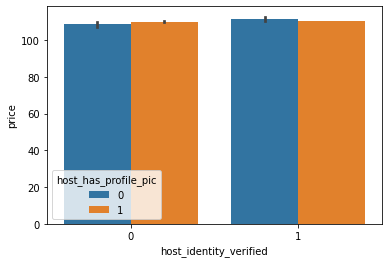

In [0]:
sns.barplot(x='host_identity_verified', y="price", hue ='host_has_profile_pic', data=Airbnb_Listings_df)

Out[15]: <AxesSubplot:xlabel='room_type', ylabel='price'>

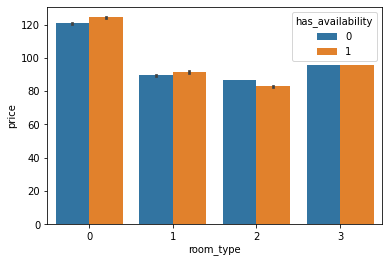

In [0]:
sns.barplot(x='room_type', y="price", hue ='has_availability', data=Airbnb_Listings_df)
# Room Type 0 -> Entire unit
# Room Type 1 -> Shared room
# Room Type 2 -> Hotel
# Room Type 3 -> Private room

Out[16]: ([<matplotlib.axis.XTick at 0x7f2160151d90>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

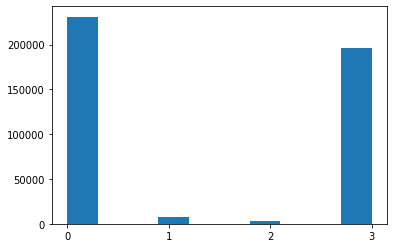

In [0]:
values = [0, 1, 2, 3] 
plt.hist(Airbnb_Listings_df['room_type'])
plt.xticks(values)

Out[17]: (array([73896., 36846., 35539., 34810., 36099., 36179., 36594., 36702.,
        37041., 74371.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

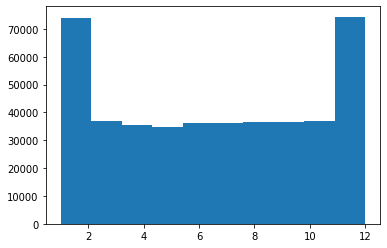

In [0]:
plt.hist(Airbnb_Listings_df['MONTH'])

Out[38]: <AxesSubplot:xlabel='MONTH', ylabel='host_response_time'>

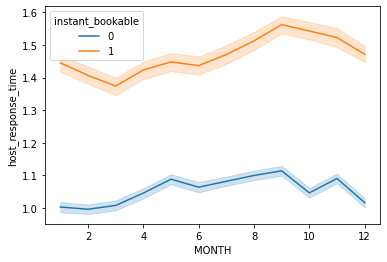

In [0]:
sns.lineplot(x='MONTH', y="host_response_time", hue ='instant_bookable', data=Airbnb_Listings_df)

Out[39]: <AxesSubplot:xlabel='MONTH', ylabel='price'>

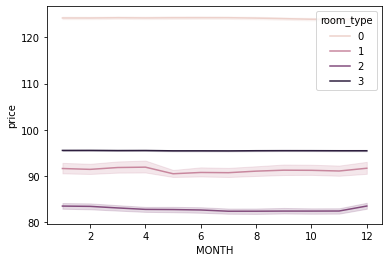

In [0]:
sns.lineplot(x='MONTH', y="price", hue ='room_type', data=Airbnb_Listings_df)

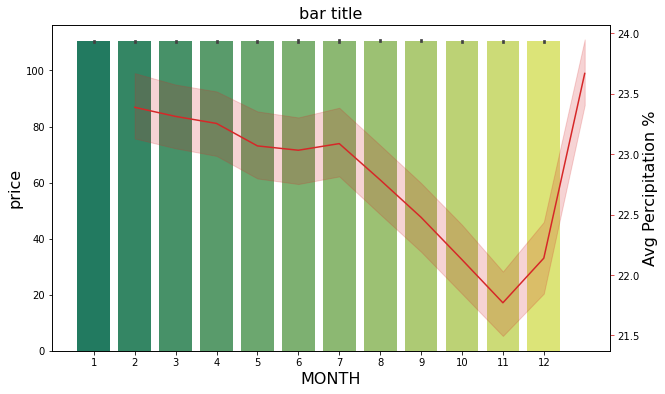

In [0]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('bar title', fontsize=16)
ax1.set_xlabel('bar x label', fontsize=16)
ax1.set_ylabel('bar y label', fontsize=16)
ax1 = sns.barplot(x='MONTH', y='price', data = Airbnb_Listings_df, palette='summer')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Avg Percipitation %', fontsize=16)
ax2 = sns.lineplot(x='MONTH', y='minimum_nights', data = Airbnb_Listings_df, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

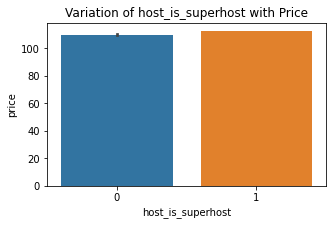

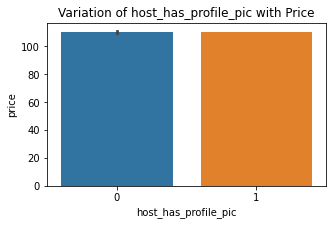

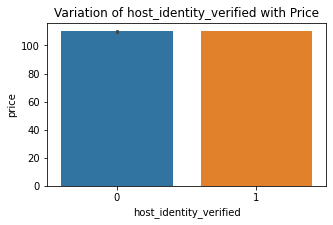

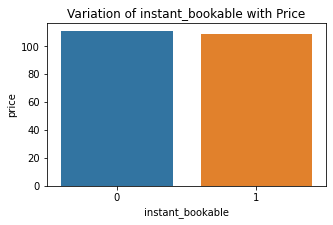

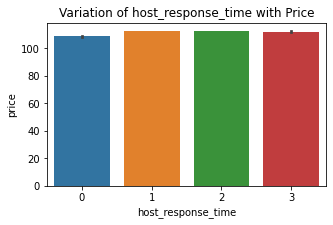

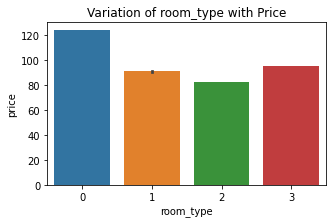

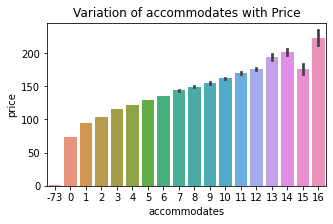

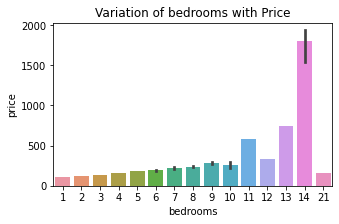

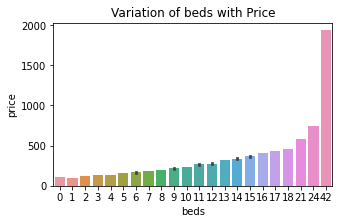

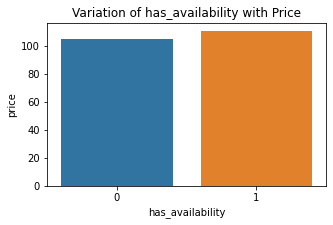

In [0]:
i=1
for x in (binary_features_df.columns):
  if x!= "price":
#     plt.subplot(i,1,i)
    plt.figure(figsize=(5,3))
    sns.barplot(x=x, y="price", data=Airbnb_Listings_df)
    x_name = x
    y_name = 'price'
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title('Variation of {x_name} with Price'.format(x_name=x_name))
    i+=1

In [0]:
continuous_features = Airbnb_Listings_Selected_Features_df.select('availability_30', 'availability_60', 'availability_90', 'MONTH', 'HOST_YRS', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count',  'latitude', 'longitude', 'amenities_count', 'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_accuracy', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month').toPandas()

<command-1346818338872149>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,3))


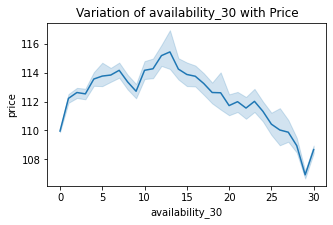

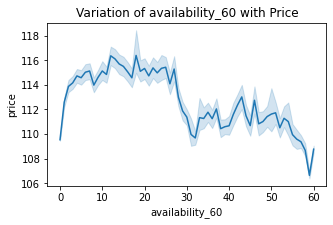

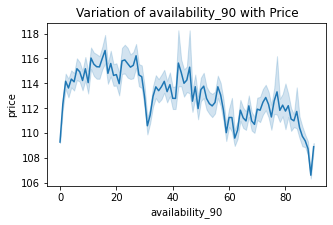

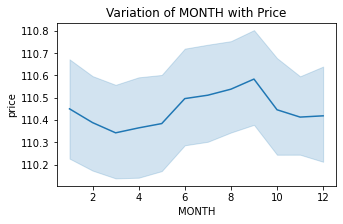

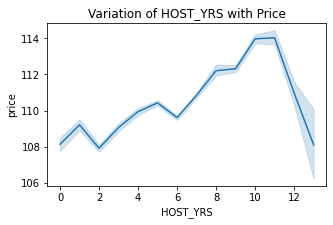

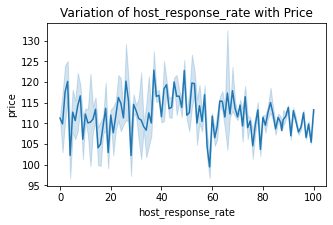

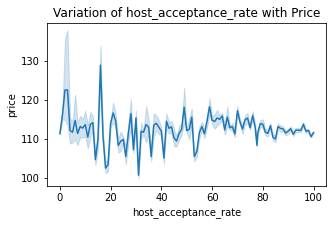

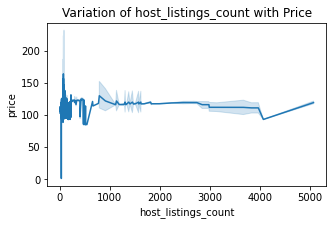

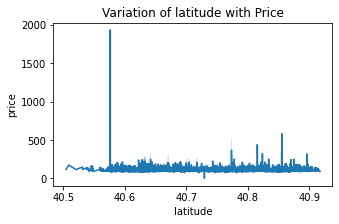

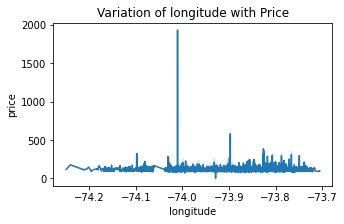

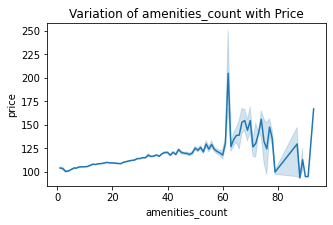

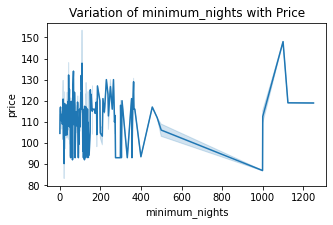

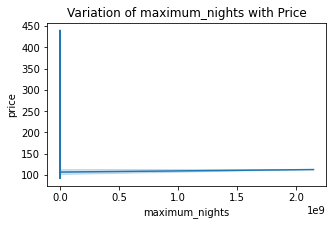

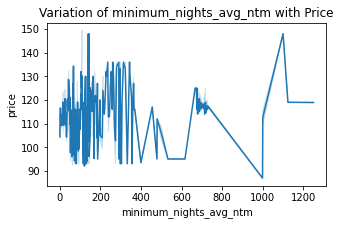

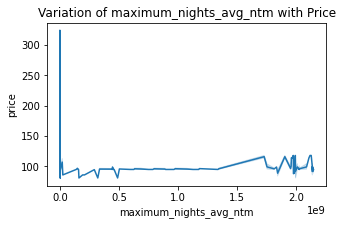

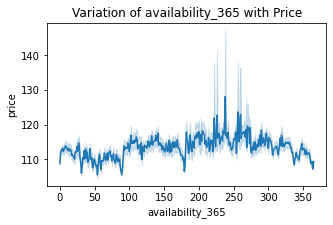

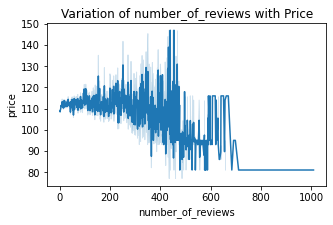

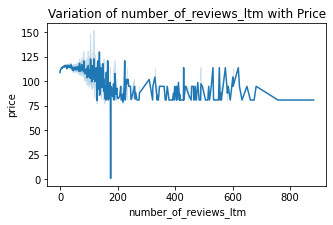

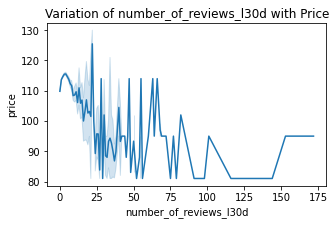

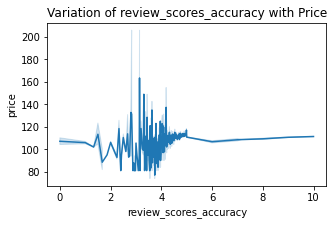

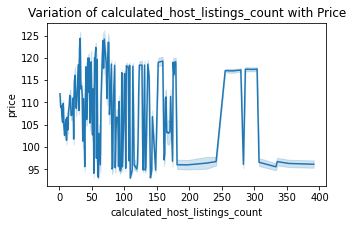

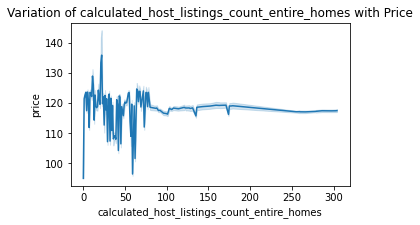

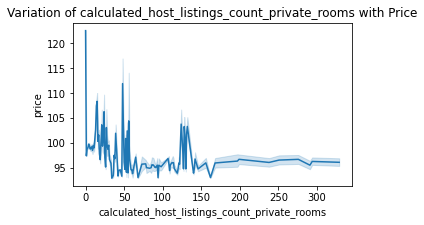

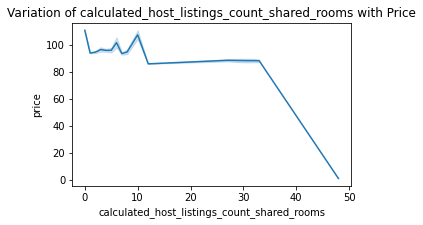

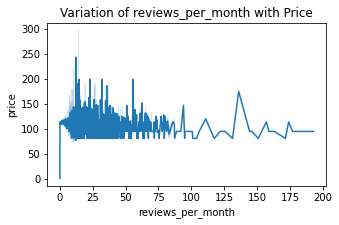

In [0]:
i=1
for x in (continuous_features.columns):
  if x!= "price":
    plt.figure(figsize=(5,3))
    sns.lineplot(x=x, y="price", data=Airbnb_Listings_df)
    x_name = x
    y_name = 'price'
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title('Variation of {x_name} with Price'.format(x_name=x_name))
    i+=1

In [0]:
from scipy.stats import ttest_ind
binary_features = binary_features_df[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'has_availability']]
non_binary_categorical_features = binary_features_df[['host_response_time', 'room_type', 'accommodates', 'bedrooms', 'beds']]
for i in binary_features.columns:
  t_value,p_value = ttest_ind(Airbnb_Listings_df['price'][Airbnb_Listings_df[i] == 0].iloc[:10000], Airbnb_Listings_df['price'][Airbnb_Listings_df[i] == 1].iloc[:10000])
  print("T-test statistics for ", i, ":")
  print('     Test statistic = %f'%float("{:.6f}".format(t_value)))
  print('     p-value for two tailed test = %f'%p_value)

T-test statistics for  host_is_superhost :
     Test statistic = -10.977183
     p-value for two tailed test = 0.000000
T-test statistics for  host_has_profile_pic :
     Test statistic = 0.192208
     p-value for two tailed test = 0.847583
T-test statistics for  host_identity_verified :
     Test statistic = -2.435759
     p-value for two tailed test = 0.014869
T-test statistics for  instant_bookable :
     Test statistic = 9.117121
     p-value for two tailed test = 0.000000
T-test statistics for  has_availability :
     Test statistic = -26.377575
     p-value for two tailed test = 0.000000


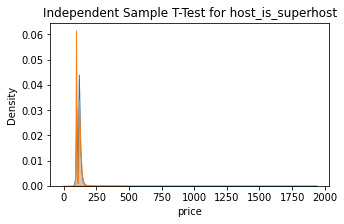

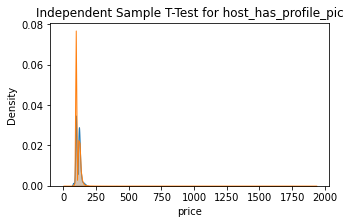

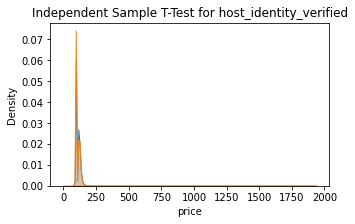

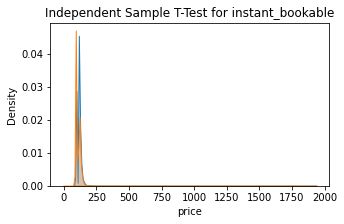

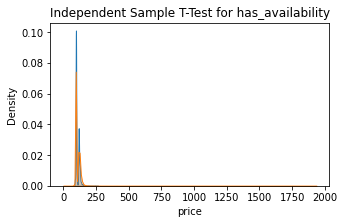

In [0]:
for i in binary_features.columns:
  plt.figure(figsize=(5,3))
  sns.kdeplot(Airbnb_Listings_df['price'][Airbnb_Listings_df[i] == 0], shade=True)
  sns.kdeplot(Airbnb_Listings_df['price'][Airbnb_Listings_df[i] == 1], shade=True)
  plt.title(f"Independent Sample T-Test for {i}")

In [0]:
from scipy import stats as stat
t_value,p_value = stat.ttest_rel(Airbnb_Listings_df['price'], Airbnb_Listings_df['room_type'])
print("T-test statistics for ", 'room_type', ":")
print('     Test statistic = %f'%float("{:.6f}".format(t_value)))
print('     p-value for two tailed test = %f'%p_value)

T-test statistics for  room_type :
     Test statistic = 3304.740625
     p-value for two tailed test = 0.000000


Out[27]: Text(0.5, 1.0, 'T-Test for room_type')

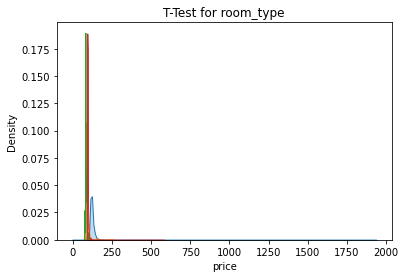

In [0]:
sns.kdeplot(Airbnb_Listings_df['price'][Airbnb_Listings_df['room_type'] == 0], shade=True)
sns.kdeplot(Airbnb_Listings_df['price'][Airbnb_Listings_df['room_type'] == 1], shade=True)
sns.kdeplot(Airbnb_Listings_df['price'][Airbnb_Listings_df['room_type'] == 2], shade=True) 
sns.kdeplot(Airbnb_Listings_df['price'][Airbnb_Listings_df['room_type'] == 3], shade=True) 
plt.title("T-Test for room_type")

In [0]:
import scipy
for i in binary_features.columns:
  if i != 'host_has_profile_pic':
    stat_value,p_value = scipy.stats.wilcoxon(Airbnb_Listings_df['price'][Airbnb_Listings_df[i] == 0].iloc[:10000], Airbnb_Listings_df['price'][Airbnb_Listings_df[i] == 1].iloc[:10000])
    print("wilcoxon-test statistics for ", i, ":")
    print('     Test statistic = %f'%float("{:.6f}".format(stat_value)))
    print('     p-value = ', p_value)
  elif i=='host_has_profile_pic':
    stat_value,p_value = scipy.stats.wilcoxon(Airbnb_Listings_df['price'][Airbnb_Listings_df[i] == 0].iloc[:1000], Airbnb_Listings_df['price'][Airbnb_Listings_df[i] == 1].iloc[:1000])
    print("wilcoxon-test statistics for ", i, ":")
    print('     Test statistic = %f'%float("{:.6f}".format(stat_value)))
    print('     p-value = ', p_value)

wilcoxon-test statistics for  host_is_superhost :
     Test statistic = 18098480.000000
     p-value =  2.1078491466656995e-32
wilcoxon-test statistics for  host_has_profile_pic :
     Test statistic = 212069.000000
     p-value =  0.4820988241037667
wilcoxon-test statistics for  host_identity_verified :
     Test statistic = 20152589.000000
     p-value =  0.0002447643420745337
wilcoxon-test statistics for  instant_bookable :
     Test statistic = 18749444.500000
     p-value =  6.328713876912896e-18
wilcoxon-test statistics for  has_availability :
     Test statistic = 17629271.000000
     p-value =  1.644279379633813e-126


In [0]:
Airbnb_Listings_Significant_Features_df = Airbnb_Listings_Selected_Features_df.select('MONTH','accommodates', 'bedrooms', 'beds', 'amenities_count', 'has_availability', 'room_type', 'price')

In [0]:
features=Airbnb_Listings_Significant_Features_df.drop('price')
print("Selected Features: ")
print(features.columns)

assembler=ft.VectorAssembler(inputCols=features.columns, outputCol='feature')
output=assembler.transform(Airbnb_Listings_Significant_Features_df)

data=output.select("feature","price")
data.show(3)

Selected Features: 
['MONTH', 'accommodates', 'bedrooms', 'beds', 'amenities_count', 'has_availability', 'room_type']
+--------------------+-----+
|             feature|price|
+--------------------+-----+
|[2.0,1.0,1.0,1.0,...| 93.0|
|[2.0,4.0,2.0,2.0,...|125.0|
|[7.0,1.0,1.0,1.0,...| 93.0|
+--------------------+-----+
only showing top 3 rows



In [0]:
train_df, test_df = data.randomSplit([0.7, 0.3])

In [0]:
gbr=GBTRegressor(featuresCol='feature', labelCol="price")
gbr_model = gbr.fit(train_df)
#Prediction on test data
predictions = gbr_model.transform(test_df)
predictions.select("prediction","price","feature").show()

In [0]:
pred_evaluator_GBT = RegressionEvaluator(predictionCol="prediction",labelCol="price",metricName="r2")
print("R2 on test data:", pred_evaluator_GBT.evaluate(predictions))

pred_evaluator_GBT = RegressionEvaluator(predictionCol="prediction",labelCol="price",metricName="rmse")
print("RMSE on test data:", pred_evaluator_GBT.evaluate(predictions))

In [0]:
dtr=DecisionTreeRegressor(featuresCol='feature', labelCol="price")
dtr_model = dtr.fit(train_df)

#Prediction on test data
predictions = dtr_model.transform(test_df)
predictions.select("prediction","price","feature").show()

In [0]:
pred_evaluator_DT = RegressionEvaluator(predictionCol="prediction",labelCol="price",metricName="r2")
print("R2 on test data:", pred_evaluator_DT.evaluate(predictions))

pred_evaluator_DT = RegressionEvaluator(predictionCol="prediction",labelCol="price",metricName="rmse")
print("RMSE on test data:", pred_evaluator_DT.evaluate(predictions))

In [0]:
rfg=RandomForestRegressor(featuresCol='feature', labelCol="price")
rfg_model = rfg.fit(train_df)

#Prediction on test data
predictions = rfg_model.transform(test_df)
predictions.select("prediction","price","feature").show()

In [0]:
pred_evaluator_RF = RegressionEvaluator(predictionCol="prediction",labelCol="price",metricName="r2")
print("R2 on test data:", pred_evaluator_RF.evaluate(predictions))

pred_evaluator_RF = RegressionEvaluator(predictionCol="prediction",labelCol="price",metricName="rmse")
print("RMSE on test data:", pred_evaluator_RF.evaluate(predictions))

In [0]:
lr=LinearRegression(featuresCol='feature', labelCol="price")
lr_model = lr.fit(train_df)

print("Coefficients :", lr_model.coefficients)
print("Intercept :", lr_model.intercept)

train_summary = lr_model.summary
print("Training RMSE:",train_summary.rootMeanSquaredError)
print("Training r2 Score:", train_summary.r2)

#Prediction on test data
predictions = lr_model.transform(test_df)
predictions.select("prediction","price","feature").show()

In [0]:
pred_evaluator_LR = RegressionEvaluator(predictionCol="prediction",labelCol="price",metricName="r2")
print("R2 on test data:", pred_evaluator_LR.evaluate(predictions))

pred_evaluator_LR = RegressionEvaluator(predictionCol="prediction",labelCol="price",metricName="rmse")
print("RMSE on test data:", pred_evaluator_LR.evaluate(predictions))